# Question
Write a program that takes an image containing multiple cartoon faces and uses ready-to-use functions from the OpenCV or skimage library to detect the faces. Then apply several linear or nonlinear spatial transformations to the faces in the image according to your preference.

• The spatial transformations should be applied manually.

• You can use available functions for inverse warping.

• Briefly research and explain in your report on what basis the library detects the faces.

# Solution
We firstly detect faces and draw a rectangle around the detected faces. 
The code loads a Haar cascade classifier for frontal face detection from the XML file named 'haarcascade_frontalface_default.xml'. This is a pre-trained classifier provided by OpenCV for detecting frontal faces in images.
Then The code converts the input image to grayscale using the cv2.cvtColor() function from OpenCV, which converts the image from the BGR color space to grayscale.
The code applies the Haar cascade classifier to the grayscale image using the cv2.CascadeClassifier.detectMultiScale() function, which returns a list of rectangles that represent the detected faces in the form of (x, y, width, height). The scaleFactor, minNeighbors, and minSize parameters are optional and can be adjusted to control the sensitivity and accuracy of face detection.
Moreover, The code iterates over the list of detected faces and draws rectangles around them using the cv2.rectangle() function from OpenCV. The rectangles are drawn on the input_image using the coordinates and dimensions (x, y, w, h) of the detected faces. The color of the rectangles is set to (0, 255, 0) which represents green, and the thickness of the rectangles is set to 10

In [76]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

input_image = cv2.imread('image1.jpg')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.2,
        minNeighbors=5,
        minSize=(100,100))

for (x, y, w, h) in faces:
    face_roi = input_image[y:y+h, x:x+w]
    cv2.rectangle(input_image, (x, y), (x+w, y+h), (0, 255, 0), 10)

cv2.imwrite('detected_image1.jpg', input_image)

True

In [70]:
def toRGB(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Rotate Transformation
Rotation transformation is a type of geometric transformation in image processing and computer vision that involves rotating an image by a certain angle around a specified point. It is a common operation used to change the orientation or alignment of an image.

In rotation transformation, the image is rotated clockwise or counterclockwise by a given angle θ around a specified center point. The rotation can be performed in various degrees, ranging from a slight rotation to a complete 360-degree rotation.

Here's how the code works:

- It first retrieves the height and width of the input image using the shape attribute of the NumPy array (img).

- It converts the input angle from degrees to radians using the np.deg2rad function from the NumPy library.
- It calculates the center point (center_x, center_y) of the image as half of its width and height, respectively.

- It calculates the cosine (cos_theta) and sine (sin_theta) of the angle.

- It defines a rotation matrix using a NumPy array that represents the 2D transformation matrix for rotation, with the elements calculated based on the angle, center point, cosine, and sine values.

- It creates a new NumPy array rotated_img with the same shape as the input image, filled with zeros, to store the rotated image.

- It iterates over the pixels of the input image using nested loops, and for each pixel, it calculates the new coordinates (new_x, new_y) after applying the rotation matrix using matrix multiplication (np.dot).
- It checks if the new coordinates fall within the bounds of the input image, and if so, it assigns the pixel value from the input image to the corresponding location in the rotated image.

- Finally, it returns the rotated image as the output.


In [24]:
def rotate_image(img, angle):
    height, width = img.shape[:2]
    theta = np.deg2rad(angle)
    center_y = height / 2
    center_x = width / 2
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    rotation_matrix = np.array([[cos_theta, -sin_theta, (1 - cos_theta) * center_x + sin_theta * center_y],
                                [sin_theta, cos_theta, (1 - cos_theta) * center_y - sin_theta * center_x],
                                [0, 0, 1]])
    rotated_img = np.zeros_like(img)
    for y in range(height):
        for x in range(width):
            new_x, new_y, _ = np.dot(rotation_matrix, [x, y, 1])
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated_img[int(new_y), int(new_x)] = img[y, x]
    return rotated_img

The code below gets every face and rotaes it by 30 degrees.
The output images are as follows:

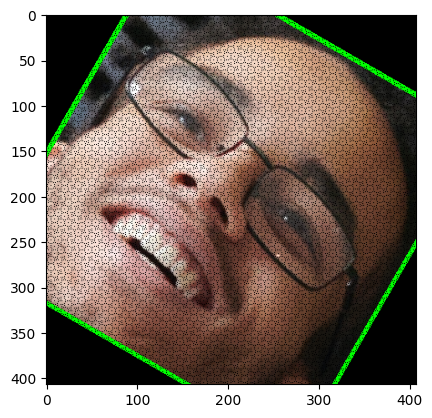

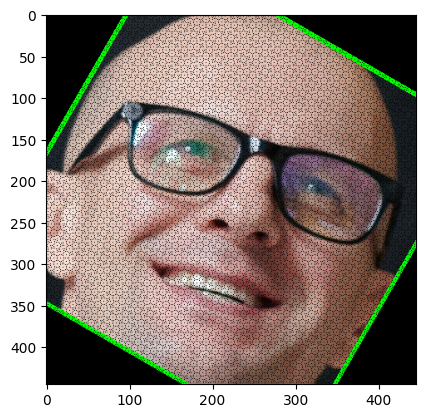

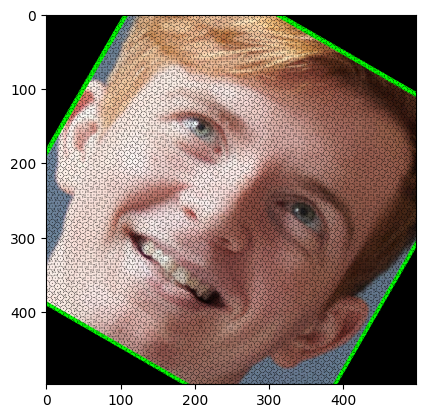

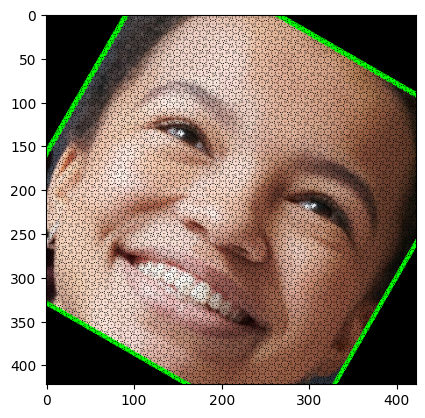

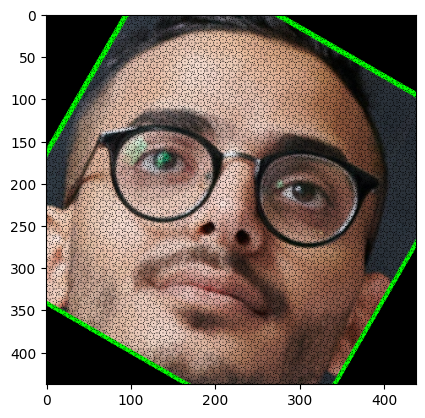

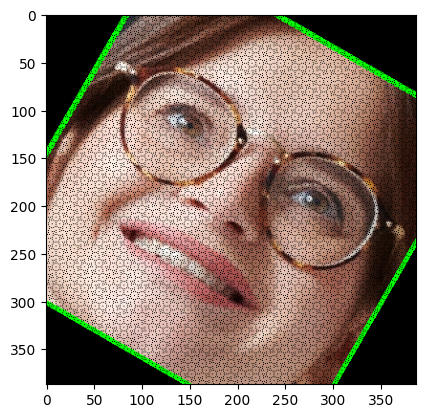

In [71]:
i = 0
for (x, y, w, h) in faces:
  face_roi = input_image[y:y+h, x:x+w]
  file_name = "rotated_images/img" + str(i) + ".jpg" 
  rotated_image = rotate_image(face_roi, 30)
  plt.imshow(toRGB(rotated_image))
  plt.show()
  cv2.imwrite(file_name, rotated_image)
  i = i + 1

## Blur Transformation
Blur transformation is a type of image processing transformation that involves reducing the sharpness or detail of an image. It is commonly used to smooth out image noise, reduce image artifacts, or blur sensitive information in images.

Blur transformation is applied to an image by averaging or averaging the neighboring pixel values within a defined window or kernel. The intensity of the blur is determined by the size of the window or kernel, with larger windows or kernels resulting in more pronounced blur. There are several types of blur transformations commonly used in image processing, including Gaussian blur, median blur, and motion blur, among others.

Gaussian blur is a popular type of blur transformation that uses a Gaussian function to determine the weights of the neighboring pixel values. It is a linear filter that is applied to each pixel in the image, taking into account the surrounding pixels based on their distance from the center pixel. Gaussian blur is commonly used for smoothing and noise reduction in images, while preserving the overall image structure.

Median blur is a non-linear filter that replaces each pixel value with the median value of the neighboring pixel values within a defined window. Median blur is particularly effective in reducing salt-and-pepper noise in images, which are isolated pixels with very high or very low intensity values.

Motion blur is a type of blur transformation that simulates the effect of motion in an image, typically caused by camera or object motion during image capture. It blurs the image along a specific direction, mimicking the streak-like appearance of moving objects or camera motion. Motion blur is often used in visual effects, computer graphics, and video processing to create realistic motion effects in images or videos.

### Code definition
The given code defines a function called blur_image which takes an input image (img) as input and applies a blur transformation using a kernel of a specified size.

The steps performed in the code are as follows:

- Define the size of the kernel for blurring. In this case, the kernel size is set to 50.

- Create a square kernel of size kernel_size x kernel_size using np.ones() to generate an array of ones, and then divide it by the square of kernel_size to normalize the kernel. This creates a convolutional kernel that can be used for blurring.

- Calculate the padding size required for the input image to ensure that the kernel can be applied to the edges of the image without going out of bounds. This is done by dividing the kernel_size by 2 and rounding down to get pad_size.

- Use cv2.copyMakeBorder() to create a padded version of the input image (img) with the calculated pad_size on all sides. The padding is done with a constant value of 0, which is used to extend the image edges.

- Create an output array convolved with the same shape as the input image (img) to store the blurred image.

- Loop through each pixel of the input image (img) using three nested loops for each dimension (height, width, and channels). For each pixel, calculate the convolution by taking the dot product between the kernel and the corresponding region of the padded image using NumPy array slicing.

- Store the result of the convolution in the corresponding position in the convolved array.

- Return the convolved array, which represents the blurred image.

In [50]:
def blur_image(img):
    kernel_size = 50
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)

    pad_size = kernel_size // 2
    padded_img = cv2.copyMakeBorder(img, pad_size, 
                                    pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT, value=0)

    convolved = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                convolved[i,j,k] = np.sum(kernel * padded_img[i:i+kernel_size, j:j+kernel_size, k])
    return convolved

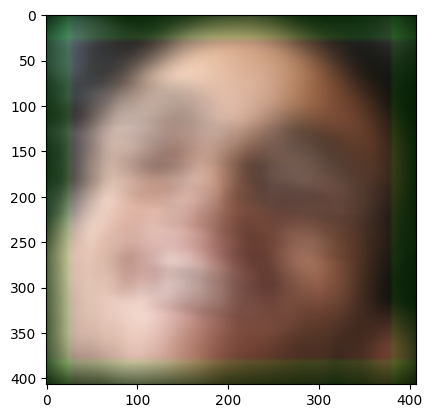

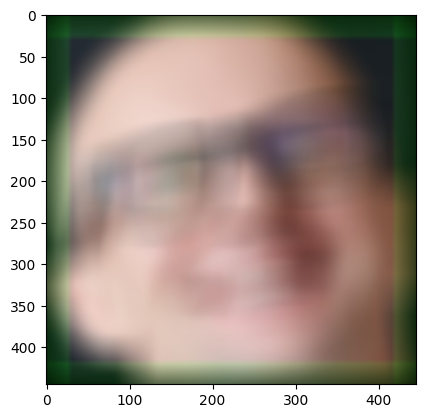

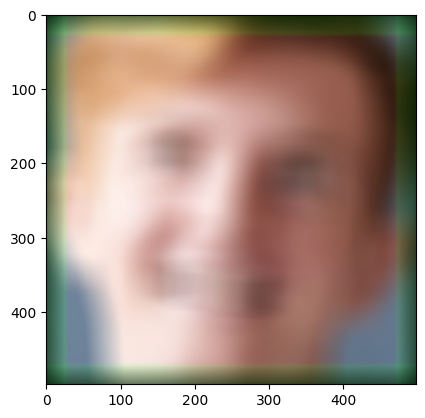

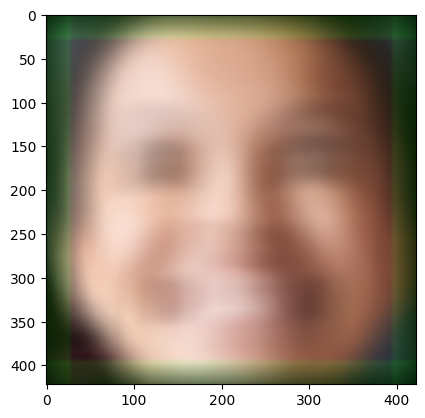

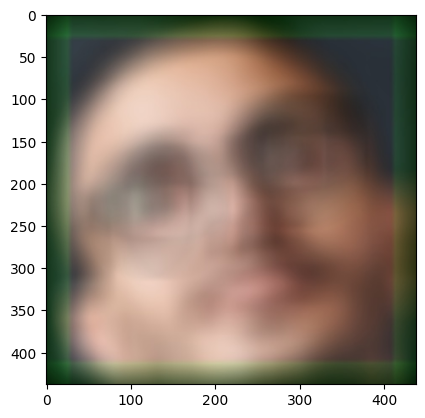

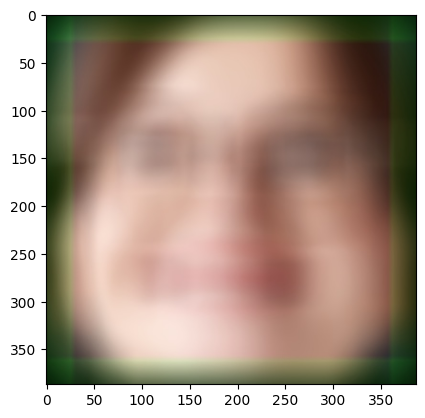

In [63]:
i = 0
for (x, y, w, h) in faces:
  face_roi = input_image[y:y+h, x:x+w]
  file_name = "blurred_images/img" + str(i) + ".jpg"
  blurered_image = blur_image(face_roi)
  cv2.imwrite(file_name, blurered_image)
  img = cv2.imread(file_name)
  plt.imshow(toRGB(img))
  plt.show()
  i = i + 1

## FishEye Transformation

Fish-eye transformation is a type of lens distortion correction used in image processing and computer vision. It is used to correct images that are captured with fish-eye lenses, which have a wide field of view and can result in distorted and curved images, especially towards the edges of the image.

The fish-eye transformation involves mapping points in the distorted fish-eye image to their corresponding points in a corrected image, such that the corrected image appears as if it was taken with a rectilinear (non-distorted) lens. The correction is typically done using mathematical equations or mapping functions that take into account the characteristics of the fish-eye lens, such as its field of view, focal length, and distortion coefficients.

There are several types of fish-eye distortion models, including equidistant, equisolid, stereographic, and orthographic, each with its own mathematical equations for correction. The corrected image typically has straight lines that are parallel to the image edges, and objects are represented with accurate shapes and sizes.

Fish-eye transformation is commonly used in applications such as computer vision, robotics, virtual reality, and augmented reality, where accurate representation of the scene geometry and object sizes is important. It is also used in photography and video editing to correct fish-eye images for more natural and visually pleasing results.

### Code definition

The fisheye_image function appears to implement the fish-eye transformation on an input image using the provided formula:

- Compute the center of the image (cx, cy) by dividing the width and height of the image by 2.
- Create a grid of x and y coordinates (x_grid, y_grid) using np.meshgrid to represent the pixel coordinates of the image.
- Convert x_grid and y_grid to float32 data type.
- Normalize x_grid and y_grid by subtracting cx and cy respectively, and dividing them by cx and cy respectively. This brings the pixel coordinates to the range of [-1, 1] with respect to the image center.
- Compute the radial distance r from the origin (image center) using the normalized x_grid and y_grid using the formula r = sqrt(x_grid**2 + y_grid**2).
- Compute the angle theta from the origin (image center) using the arctangent function np.arctan2(y_grid, x_grid).
- Apply the fish-eye distortion formula r_d = r * (1 + k*r**2) to compute the distorted radial distance r_d.
- Compute the distorted x and y coordinates x_d and y_d using x_d = r_d * np.cos(theta) and y_d = r_d * np.sin(theta).
- Undo the normalization by multiplying x_d and y_d by cx and cy respectively, and then adding cx and cy respectively.
- Use the cv2.remap function to remap the pixels of the input image using the computed x_d and y_d as the destination coordinates, and the specified interpolation method cv2.INTER_LINEAR and border mode cv2.BORDER_CONSTANT.
- Return the distorted image as the result of the function.

In [55]:
def fisheye_image(image, k):
    cx, cy = image.shape[1] / 2, image.shape[0] / 2
    x_grid, y_grid = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
    x_grid = x_grid.astype(np.float32)
    y_grid = y_grid.astype(np.float32)
  
    x_grid = (x_grid - cx) / cx
    y_grid = (y_grid - cy) / cy
    
    r = np.sqrt(x_grid**2 + y_grid**2)
    
    theta = np.arctan2(y_grid, x_grid)
    r_d = r * (1 + k*r**2)
    x_d = r_d * np.cos(theta)
    y_d = r_d * np.sin(theta)
    x_d = x_d * cx + cx
    y_d = y_d * cy + cy
    
    distorted_image = cv2.remap(image, x_d, y_d, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    
    return distorted_image

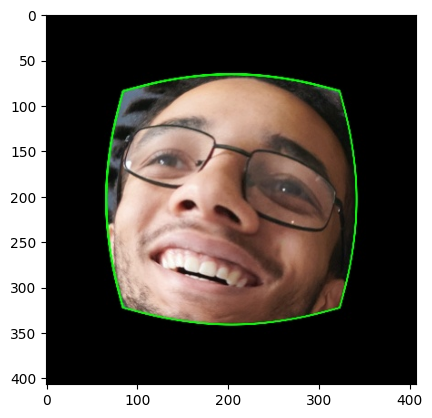

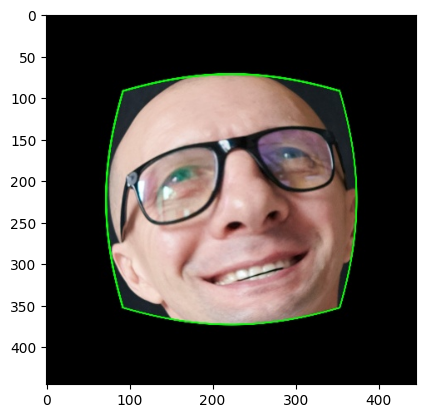

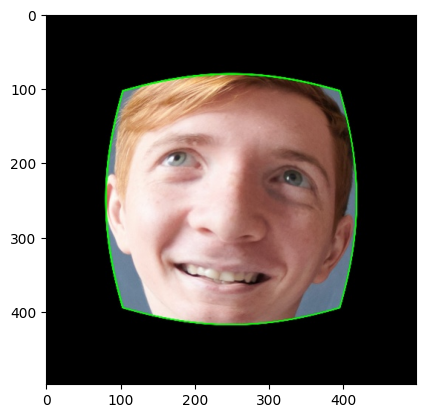

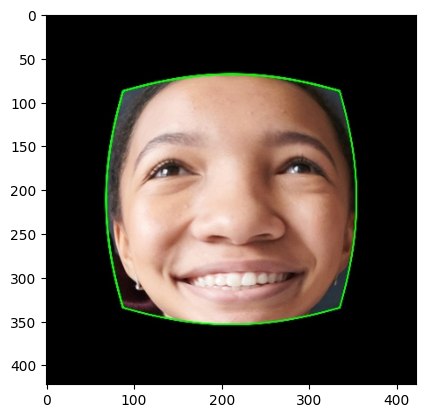

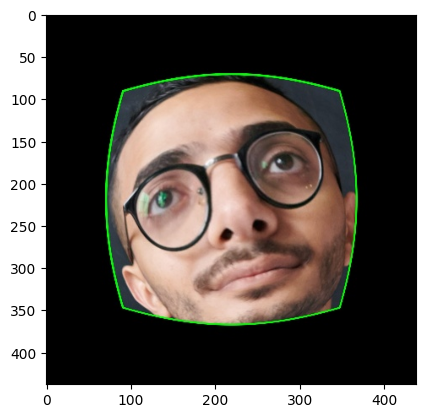

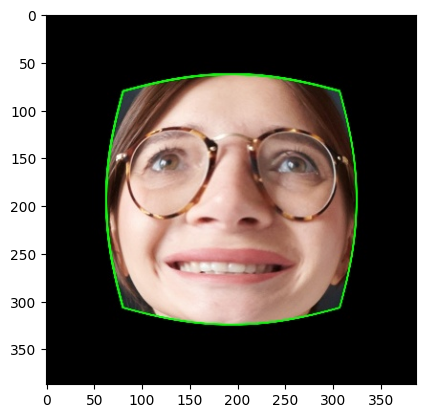

In [62]:
i = 0
for (x, y, w, h) in faces:
  face_roi = input_image[y:y+h, x:x+w]
  file_name = "fisheye_images/img" + str(i) + ".jpg"
  fisheyed_image = fisheye_image(face_roi, k=1)
  cv2.imwrite(file_name, fisheyed_image)
  img = cv2.imread(file_name, cv2.IMREAD_COLOR)
  plt.imshow(toRGB(img))
  plt.show()
  i = i + 1

## Scaling Transformation

Scaling transformation, also known as scaling or resizing, is a type of geometric transformation applied to an object or an image to change its size. It involves multiplying or dividing the coordinates or dimensions of the object or image by a scaling factor along one or more axes.

### Code definition

The code defines a function called scale_image that performs scaling transformation on an input image using given scaling factors sx and sy. The function takes an image img as input, which is a NumPy array representing an image, and two scaling factors sx and sy as arguments. It returns the scaled image as a NumPy array.

Here is a breakdown of the code:

- Get the height, width, and number of channels (typically 3 for RGB images) of the input image using the shape attribute of the NumPy array.

- Create a new NumPy array scaled_img to store the scaled image. The dimensions of the new image are calculated by multiplying the original height and width with the scaling factors sy and sx respectively, and converting them to integers using int().

- Loop through the rows and columns of the scaled image using nested for loops, where y represents the row index and x represents the column index.

- Calculate the corresponding coordinates u and v in the original image using the inverse of the scaling factors sx and sy, respectively. This is done by dividing x by sx and y by sy.

- Check if the calculated coordinates u and v fall within the bounds of the original image (i.e., between 0 and the original width for u, and between 0 and the original height for v).

- If the calculated coordinates u and v are within the bounds of the original image, copy the pixel values from the original image at the nearest integer coordinates int(u) and int(v) to the corresponding coordinates x and y in the scaled image. This is done for all channels (typically Red, Green, and Blue) of the image.

- Repeat steps 4-6 for all pixels in the scaled image to complete the scaling transformation.

- Return the scaled image as a NumPy array. Note that the pixel values in the scaled image are of data type uint8, which is the typical data type used to represent image pixel values in the range of 0 to 255.


In [67]:
def scale_image(img, sx, sy):
    height, width, channels = img.shape
    scaled_img = np.zeros((int(height*sy), int(width*sx), channels), dtype=np.uint8)
    for y in range(int(height*sy)):
        for x in range(int(width*sx)):
            u, v = x / sx, y / sy
            if 0 <= u < width and 0 <= v < height:
                for c in range(channels):
                    scaled_img[y, x, c] = img[int(v), int(u), c]

    return scaled_img

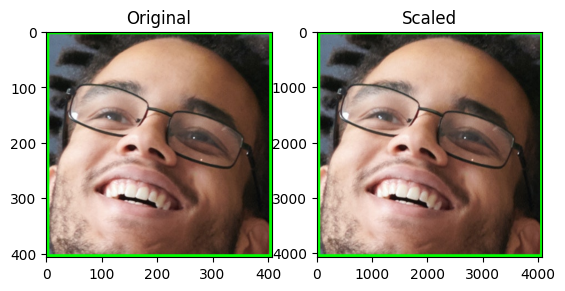

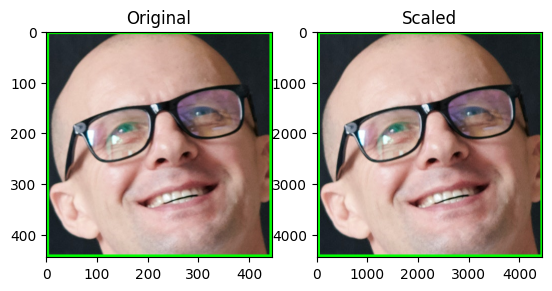

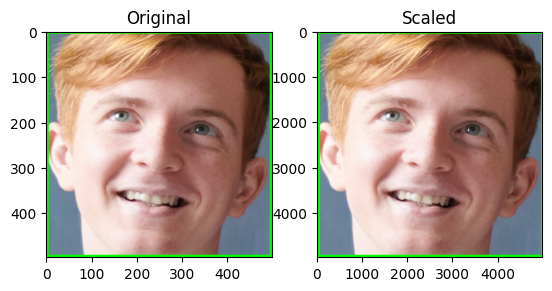

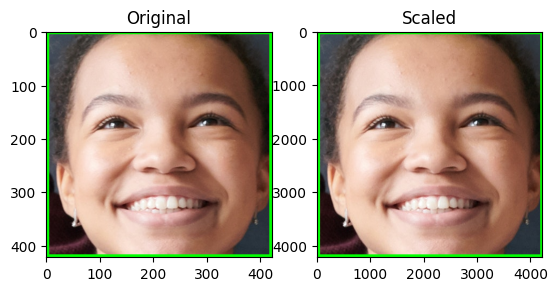

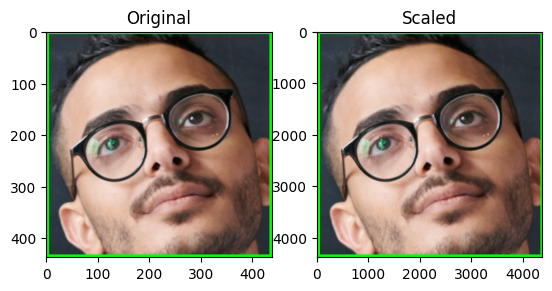

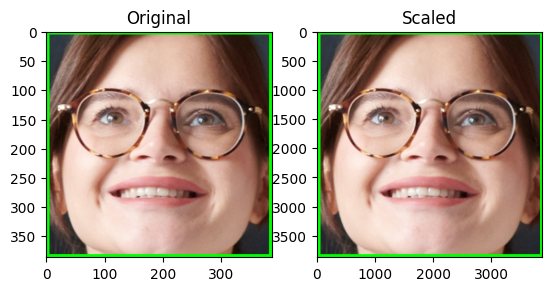

In [74]:
for (x, y, w, h) in faces:
    face_roi = input_image[y:y+h, x:x+w]
    sx = 10
    sy = 10

    scaled_img = scale_image(face_roi, sx, sy)

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(toRGB(face_roi))
    ax1.set_title("Original")
    ax2.imshow(toRGB(scaled_img))
    ax2.set_title("Scaled")
    plt.show()

## Horizontal wave Transformation
Horizontal wave transformation, also known as horizontal wave distortion, is a type of image distortion that introduces a wavy pattern along the horizontal axis of an image. It is a geometric transformation that warps the image along the horizontal direction while leaving the vertical direction unchanged. This type of distortion can create interesting visual effects and can be used for creative purposes in image editing and manipulation.

Horizontal wave transformation can be achieved using various techniques, such as mathematical algorithms, image processing filters, or pixel manipulation operations. The intensity and frequency of the waves can be controlled to achieve the desired effect. For example, small waves with low intensity can create a subtle wavy pattern, while larger waves with higher intensity can create a more pronounced distortion.

### Code definition

This code defines a function horizontal_wave that applies a horizontal wave transformation on an input image array img_arr. The function uses a helper function wave to compute the vertical offset for each pixel in the input image.

The wave function takes four parameters:

- x: The horizontal position of the pixel
- y: The vertical position of the pixel
- height: The height of the input image
- wavelength: The wavelength of the wave

The function computes the vertical offset for the pixel at position (x, y) using the formula y + amplitude * np.sin(2 * np.pi * x / wavelength), where amplitude is a parameter that determines the intensity of the wave. A larger amplitude value will result in a more pronounced wave distortion.

The horizontal_wave function takes an input image array img_arr, which is assumed to be a 2D NumPy array representing an image, and returns a new image array new_img_arr of the same shape as the input image.

The function iterates over each pixel in the input image using nested loops over the width and height of the image. For each pixel, it computes the vertical offset using the wave function with a fixed wavelength of 20 and amplitude of 10. The computed offset is used to retrieve the corresponding pixel from the input image, and the pixel value is copied to the corresponding position in the new image array new_img_arr.

In [65]:
def wave(x, y, height, wavelength, amplitude):
    return y + amplitude * np.sin(2 * np.pi * x / wavelength)

def horizontal_wave(img_arr):
    height, width = img_arr.shape[:2]
    new_img_arr = np.zeros_like(img_arr)
    for x in range(width):
        for y in range(height):
            offset_x = int(wave(x, y, height, 20, 10))
            if offset_x < 0:
                offset_x = 0
            elif offset_x >= height:
                offset_x = height - 1
            new_img_arr[y, x] = img_arr[offset_x, x]
    return new_img_arr

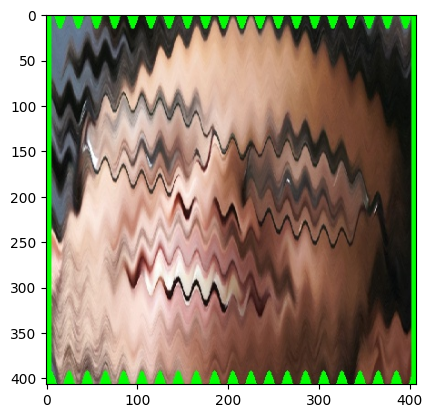

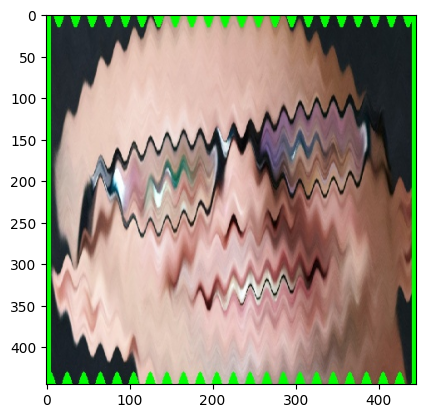

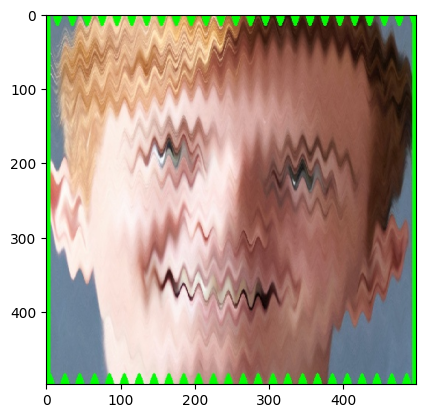

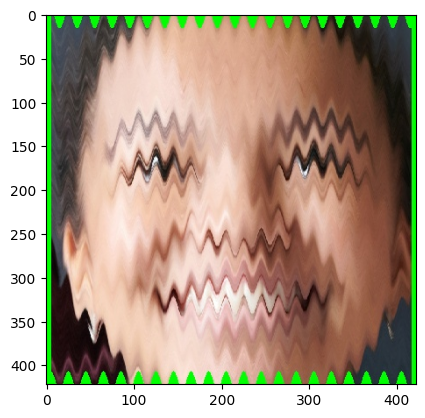

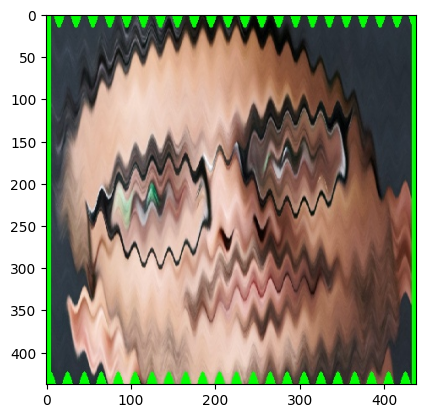

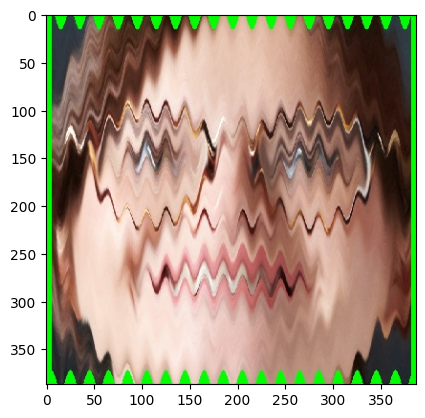

In [66]:
i = 0
for (x, y, w, h) in faces:
  face_roi = input_image[y:y+h, x:x+w]
  file_name = "wave_images/img" + str(i) + ".jpg"
  wave_image = horizontal_wave(face_roi)
  cv2.imwrite(file_name, wave_image)
  img = cv2.imread(file_name, cv2.IMREAD_COLOR)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
  i = i + 1

## Flip Transformation

The flip transformation is a common image processing operation that involves flipping an image along a specific axis, resulting in a mirror reflection of the image. There are three types of flip transformations: horizontal flip, vertical flip, and both horizontal and vertical flip.

Horizontal Flip: In a horizontal flip, the image is flipped along the vertical axis, resulting in a mirror reflection of the image horizontally. Pixels that were originally on the left side of the image are now on the right side, and vice versa.

Vertical Flip: In a vertical flip, the image is flipped along the horizontal axis, resulting in a mirror reflection of the image vertically. Pixels that were originally at the top of the image are now at the bottom, and pixels that were originally at the bottom are now at the top.

Both Horizontal and Vertical Flip: In a both horizontal and vertical flip, the image is flipped along both the horizontal and vertical axes, resulting in a mirror reflection of the image both horizontally and vertically. Pixels that were originally on the top-left corner of the image are now on the bottom-right corner, and pixels that were originally on the bottom-right corner are now on the top-left corner.


### Code definition

The code defines a function flip_image(image, direction) that performs a flip transformation on an input image along a specified direction. The function takes two parameters as input:

- image: A 2D list or array representing the input image. Each element in the list represents a pixel value in the image.

- direction: A string indicating the desired direction of flip. It can be one of three values: 'horizontal', 'vertical', or 'both'.


The function then applies the flip transformation based on the specified direction as follows:

- direction == 'horizontal': The function reverses the order of elements in each row of the input image, effectively flipping the image horizontally.

- direction == 'vertical': The function reverses the order of rows in the input image, effectively flipping the image vertically.

- direction == 'both': The function first reverses the order of rows in the input image, and then reverses the order of elements in each row, effectively flipping the image both horizontally and vertically.


The flipped image is returned as a new 2D list or array, representing the result of the flip transformation. This code uses list comprehension to perform the flip operation on each row of the input image. Note that the original input image is not modified, and a new flipped image is returned.


In [75]:
def flip_image(image, direction):
    if direction == 'horizontal':
        return [row[::-1] for row in image]
    elif direction == 'vertical':
        return image[::-1]
    elif direction == 'both':
        return [row[::-1] for row in image[::-1]]

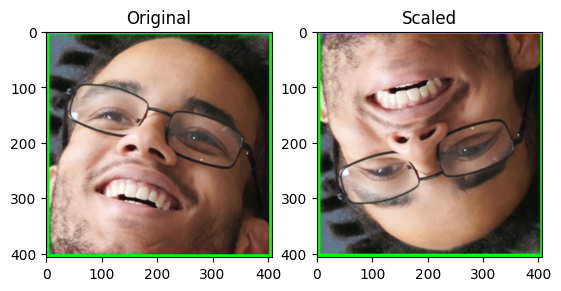

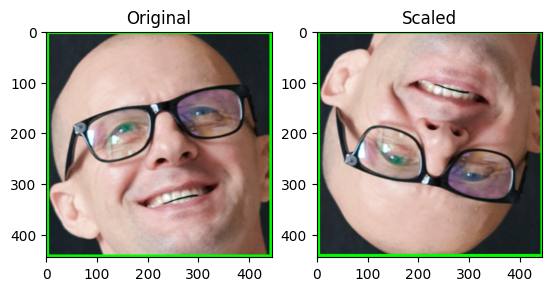

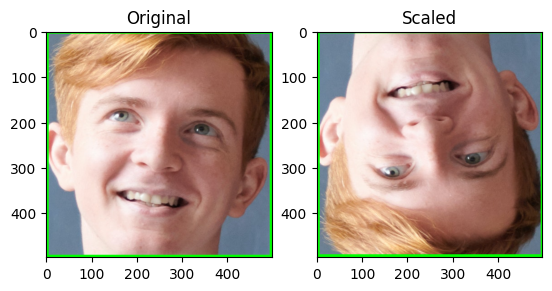

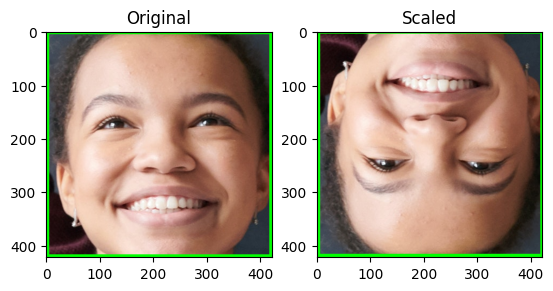

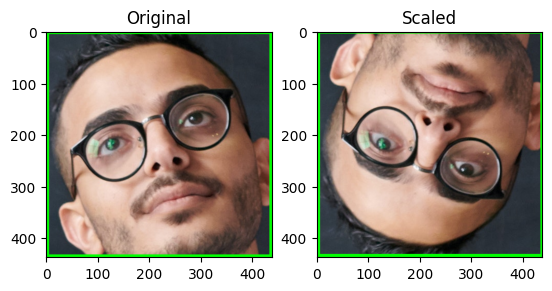

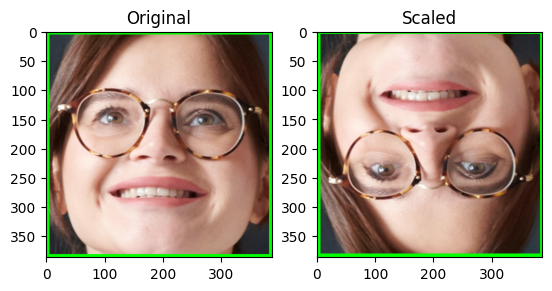

In [78]:
for (x, y, w, h) in faces:
    face_roi = input_image[y:y+h, x:x+w]
    sx = 10
    sy = 10
    flipped_img = flip_image(face_roi, "vertical")

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(toRGB(face_roi))
    ax1.set_title("Original")
    ax2.imshow(toRGB(flipped_img))
    ax2.set_title("Scaled")
    plt.show()